In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/digit-recognizer/train.csv')
display(df.head())

# one-hot encording with pandas
t_data = df[['label']].copy()
t_data = pd.get_dummies(t_data, columns=['label'])
display(t_data.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


[pandas.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html?highlight=dummy) : Pandas를 이용한 one-hot encording

In [3]:
# Training, test data split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop(columns='label', inplace=False), t_data,
                 test_size=0.3, random_state=0)

# Normalization
scaler = MinMaxScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

In [4]:
# Model
model = Sequential()
model.add(Flatten(input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=1e-2), 
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_data_train_norm, t_data_train, 
                    epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
735/735 [==============================] - 1s 1ms/step - loss: 2.0022 - accuracy: 0.2705 - val_loss: 1.4074 - val_accuracy: 0.5946
Epoch 2/100
735/735 [==============================] - 1s 991us/step - loss: 1.3280 - accuracy: 0.5364 - val_loss: 0.8182 - val_accuracy: 0.7803
Epoch 3/100
735/735 [==============================] - 1s 1ms/step - loss: 1.0250 - accuracy: 0.6461 - val_loss: 0.6158 - val_accuracy: 0.8362
Epoch 4/100
735/735 [==============================] - 1s 1ms/step - loss: 0.8477 - accuracy: 0.7170 - val_loss: 0.4839 - val_accuracy: 0.8723
Epoch 5/100
735/735 [==============================] - 1s 1ms/step - loss: 0.7168 - accuracy: 0.7679 - val_loss: 0.3925 - val_accuracy: 0.8969
Epoch 6/100
735/735 [==============================] - 1s 1ms/step - loss: 0.6303 - accuracy: 0.8051 - val_loss: 0.3491 - val_accuracy: 0.9070
Epoch 7/100
735/735 [==============================] - 1s 1ms/step - loss: 0.5636 - accuracy: 0.8298 - val_loss: 0.3054 - val_accuracy: 0.91

735/735 [==============================] - 1s 987us/step - loss: 0.1037 - accuracy: 0.9709 - val_loss: 0.1892 - val_accuracy: 0.9650
Epoch 58/100
735/735 [==============================] - 1s 1ms/step - loss: 0.0981 - accuracy: 0.9731 - val_loss: 0.1876 - val_accuracy: 0.9634
Epoch 59/100
735/735 [==============================] - 1s 1ms/step - loss: 0.0976 - accuracy: 0.9719 - val_loss: 0.1940 - val_accuracy: 0.9634
Epoch 60/100
735/735 [==============================] - 1s 981us/step - loss: 0.1033 - accuracy: 0.9713 - val_loss: 0.1929 - val_accuracy: 0.9636
Epoch 61/100
735/735 [==============================] - 1s 1ms/step - loss: 0.0955 - accuracy: 0.9745 - val_loss: 0.1945 - val_accuracy: 0.9629
Epoch 62/100
735/735 [==============================] - 1s 1ms/step - loss: 0.1005 - accuracy: 0.9722 - val_loss: 0.1999 - val_accuracy: 0.9641
Epoch 63/100
735/735 [==============================] - 1s 1ms/step - loss: 0.1009 - accuracy: 0.9720 - val_loss: 0.1958 - val_accuracy: 0.9648
E

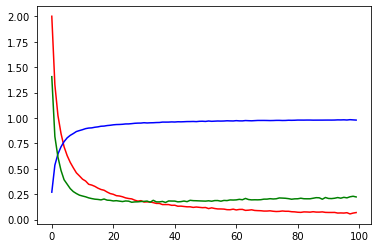

In [5]:
# 학습결과 확인
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_loss'], color='g')
plt.show()

In [6]:
# 예측
print(model.evaluate(x_data_test_norm, t_data_test))

394/394 [==============================] - 0s 573us/step - loss: 0.1982 - accuracy: 0.9683
[0.19816230237483978, 0.9683333039283752]


## Model 2 with Adam optimizer

In [7]:
# Model
model2 = Sequential()
model2.add(Flatten(input_shape=(784,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer=Adam(learning_rate=1e-2), 
              loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(x_data_train_norm, t_data_train, 
                    epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
735/735 [==============================] - 1s 1ms/step - loss: 0.8809 - accuracy: 0.7152 - val_loss: 0.4347 - val_accuracy: 0.8871
Epoch 2/100
735/735 [==============================] - 1s 1ms/step - loss: 0.5671 - accuracy: 0.8489 - val_loss: 0.3830 - val_accuracy: 0.9039
Epoch 3/100
735/735 [==============================] - 1s 1ms/step - loss: 0.5107 - accuracy: 0.8660 - val_loss: 0.3832 - val_accuracy: 0.9114
Epoch 4/100
735/735 [==============================] - 1s 1ms/step - loss: 0.4886 - accuracy: 0.8746 - val_loss: 0.4284 - val_accuracy: 0.8954
Epoch 5/100
735/735 [==============================] - 1s 1ms/step - loss: 0.4813 - accuracy: 0.8750 - val_loss: 0.3334 - val_accuracy: 0.9272
Epoch 6/100
735/735 [==============================] - 1s 1ms/step - loss: 0.4504 - accuracy: 0.8822 - val_loss: 0.3561 - val_accuracy: 0.9221
Epoch 7/100
735/735 [==============================] - 1s 1ms/step - loss: 0.4223 - accuracy: 0.8904 - val_loss: 0.3309 - val_accuracy: 0.9281

735/735 [==============================] - 1s 1ms/step - loss: 0.4195 - accuracy: 0.8818 - val_loss: 0.3664 - val_accuracy: 0.9362
Epoch 58/100
735/735 [==============================] - 1s 1ms/step - loss: 0.3925 - accuracy: 0.8866 - val_loss: 0.3581 - val_accuracy: 0.9379
Epoch 59/100
735/735 [==============================] - 1s 1ms/step - loss: 0.4175 - accuracy: 0.8806 - val_loss: 0.3822 - val_accuracy: 0.9364
Epoch 60/100
735/735 [==============================] - 1s 1ms/step - loss: 0.4005 - accuracy: 0.8858 - val_loss: 0.4112 - val_accuracy: 0.9393
Epoch 61/100
735/735 [==============================] - 1s 1ms/step - loss: 0.4258 - accuracy: 0.8808 - val_loss: 0.3491 - val_accuracy: 0.9449
Epoch 62/100
735/735 [==============================] - 1s 1ms/step - loss: 0.4009 - accuracy: 0.8871 - val_loss: 0.3623 - val_accuracy: 0.9408
Epoch 63/100
735/735 [==============================] - 1s 1ms/step - loss: 0.4225 - accuracy: 0.8807 - val_loss: 0.4658 - val_accuracy: 0.9371
Epoch

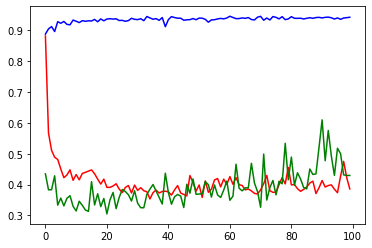

In [8]:
# 학습결과 확인
plt.plot(history2.history['loss'], color='r')
plt.plot(history2.history['val_accuracy'], color='b')
plt.plot(history2.history['val_loss'], color='g')
plt.show()

In [9]:
# 예측
print(model2.evaluate(x_data_test_norm, t_data_test))

394/394 [==============================] - 0s 593us/step - loss: 0.3459 - accuracy: 0.9486
[0.3459218442440033, 0.9485714435577393]
